In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt #plotting
import librosa.display #audio data show
import os
import pandas as pd
import librosa
import glob 
import numpy as np
import random

**Load Data**

In [4]:
import librosa
audio_file_path='/content/drive/MyDrive/DataMining/Datasets/Minimal/rec01.mp3'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path) #analog to digital-sampling rate , sampling r por data list e pabo
print(librosa_audio_data)
print("Audio data :", len(librosa_audio_data)) #array length
print("Sample Rate :", librosa_sample_rate)   #value

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[ 6.1650295e-04  1.1957149e-03  9.4666175e-04 ... -7.4860523e-08
  5.7690094e-08  0.0000000e+00]
Audio data : 23307
Sample Rate : 22050


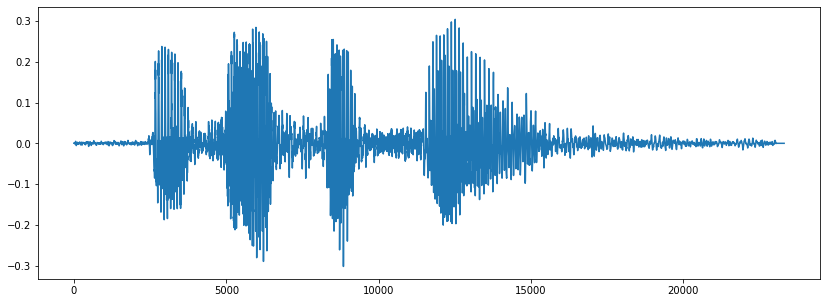

In [5]:
# Original audio with 1 channel 
plt.figure(figsize=(14, 5))
plt.plot(librosa_audio_data)

In [6]:
import librosa
# Trim the beginning and ending silence
trimed_librosa_audio_data, index = librosa.effects.trim(librosa_audio_data)
# Print the durations
print(len(trimed_librosa_audio_data))
print(len(librosa_audio_data))
print(librosa.get_duration(trimed_librosa_audio_data), librosa.get_duration(librosa_audio_data))

23307
23307
1.0570068027210884 1.0570068027210884


In [7]:
y_harm, y_perc = librosa.effects.hpss(trimed_librosa_audio_data)
print(len(y_harm))
print(len(y_perc))

23307
23307


**Extract Features**

*   Mel-Frequency Cepstral Coefficients(MFCC)
*   Zero Crossing Rate(the rate at which the signal changes from positive to negative or back.)
*   Harmonics and Perceptrual
*   Tempo BMP (beats per minute)
*   Spectral Centroid
*   Spectral Rolloff
*   Chroma Frequencies










In [8]:
mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40) #40 - koto boro length r feature array chai
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #mean-normalization

extracted_features=[]
extracted_features.append([mfccs_scaled_features])
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature'])
extracted_features_df.head()

,feature
0,"[-345.9266, 145.2937, 18.525759, 8.906574, -14..."


In [9]:
import os
from os import listdir
from os.path import join, isfile
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np

datasetdir = '/content/drive/MyDrive/DataMining/Datasets'
os.chdir(datasetdir) #chng directory- directory chng hoye sound dataset ase
curr_path = os.path.join(datasetdir, 'Mild')
files = [f for f in listdir(curr_path) if isfile(join(curr_path, f))]
print(files)

['rec02.mp3', 'rec06.mp3', 'rec14.mp3', 'rec15.mp3', 'rec18.mp3', 'rec23.mp3', 'rec27.mp3', 'rec34.mp3', 'rec35.mp3', 'rec20.mp3', '105_n.mp3', '106_n.mp3', '110_n.mp3', '111_n.mp3', '112_n.mp3', '116_n.mp3', '117_n.mp3', '118_n.mp3', '123_n.mp3', '128_n.mp3', '129_n.mp3', '131_n.mp3', '132_n.mp3', 'rec37_n.mp3', 'rec38_n.mp3', 'rec40_n.mp3', 'rec41_n.mp3', '101_n.mp3', 'rec47_n.mp3', '102_n.mp3', 'rec53_n.mp3', 'rec52_n.mp3', 'rec57_n.mp3', '104_n.mp3', 'rec61_n.mp3', 'rec65_n.mp3', 'rec68_n.mp3', 'rec69_n.mp3', 'rec72_n.mp3', 'rec76_n.mp3', 'rec77_n.mp3', 'rec80_n.mp3', 'rec83_n.mp3', 'rec88_n.mp3', 'rec90_n.mp3', 'rec98_n.mp3', 'rec96_n.mp3', 'rec93_n.mp3', '136_n.mp3', '138_n.mp3', '141_n.mp3', '145_n.mp3', '153_n.mp3', '157_n.mp3', '158_n.mp3', '159_n.mp3', '160_n.mp3', '161_n.mp3', '163_n.mp3', '164_n.mp3', '169_n.mp3', '171_n.mp3', '173_n.mp3', '174_n.mp3', '175_n.mp3', '177_n.mp3', '178_n.mp3', '179_n.mp3', '150_n.mp3', '154_n.mp3', '180_n.mp3', '181_n.mp3', '182_n.mp3', '183_n

1. Min -> ***m1***
2. Max -> ***m2***
3. Mean -> ***m3***
4. Median -> ***m4***
5. Standard deviation -> ***m5*** 
6. Varience -> ***m6***

In [10]:
from librosa.core.harmonic import harmonics_2d
import numpy as np

from itertools import chain
classes = ['Minimal', 'Mild', 'Moderate', 'Extreme']
#classes = ['angry', 'disgusting', 'fear', 'happy', 'neutral', 'sad']
extracted_features=[]
for i in range(len(classes)):
  curr_path = os.path.join(datasetdir, classes[i])
  files = [f for f in listdir(curr_path) if isfile(join(curr_path, f))]
  for j in range(0,len(files)):
    librosa_audio_data, librosa_sample_rate = librosa.load(curr_path+"/"+files[j])
    # print(len(librosa_audio_data))
    # print(librosa_sample_rate)
    trimed_librosa_audio_data, index = librosa.effects.trim(librosa_audio_data)
    mfccs_features = librosa.feature.mfcc(y=trimed_librosa_audio_data, sr=librosa_sample_rate)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) 
    mfccs_scaled_features = list(mfccs_scaled_features) # mfcc feature
    mfcc_m1 = np.min(mfccs_scaled_features)
    mfcc_m2 = np.max(mfccs_scaled_features)
    mfcc_m3 = np.mean(mfccs_scaled_features)
    mfcc_m4 = np.median(mfccs_scaled_features)
    mfcc_m5 = np.std(mfccs_scaled_features)
    mfcc_m6 = np.var(mfccs_scaled_features)
    #---------------------------------------------------------------------------------------
    harmonics, perceptrual = librosa.effects.hpss(trimed_librosa_audio_data)
    harmonics = list(harmonics) # harmonics feature
    harmonics_m1 = np.min(harmonics)
    harmonics_m2 = np.max(harmonics)
    harmonics_m3 = np.mean(harmonics)
    harmonics_m4 = np.median(harmonics)
    harmonics_m5 = np.std(harmonics)
    harmonics_m6 = np.var(harmonics)
    #----------------------------------------------------------------------------------------
    perceptrual = list(perceptrual) # perceptrual feature
    perceptrual_m1 = np.min(perceptrual)
    perceptrual_m2 = np.max(perceptrual)
    perceptrual_m3 = np.mean(perceptrual)
    perceptrual_m4 = np.median(perceptrual)
    perceptrual_m5 = np.std(perceptrual)
    perceptrual_m6 = np.var(perceptrual)
    #------------------------------------------------------------------------------------------
    zero_crossing_rate = librosa.feature.zero_crossing_rate(trimed_librosa_audio_data)
    zero_crossing_rate = list(chain.from_iterable(zero_crossing_rate)) #flattening
    zero_crossing_rate_m1 = np.min(zero_crossing_rate)
    zero_crossing_rate_m2 = np.max(zero_crossing_rate)
    zero_crossing_rate_m3 = np.mean(zero_crossing_rate)
    zero_crossing_rate_m4 = np.median(zero_crossing_rate)
    zero_crossing_rate_m5 = np.std(zero_crossing_rate)
    zero_crossing_rate_m6 = np.var(zero_crossing_rate)
    #-------------------------------------------------------------------------------------------
    S, phase = librosa.magphase(librosa.stft(trimed_librosa_audio_data))
    spectral_rollof = librosa.feature.spectral_rolloff(S=S, sr=librosa_sample_rate)
    spectral_rollof = list(chain.from_iterable(spectral_rollof))
    spectral_rollof_m1 = np.min(spectral_rollof)
    spectral_rollof_m2 = np.max(spectral_rollof)
    spectral_rollof_m3 = np.mean(spectral_rollof)
    spectral_rollof_m4 = np.median(spectral_rollof)
    spectral_rollof_m5 = np.std(spectral_rollof)
    spectral_rollof_m6 = np.var(spectral_rollof)
    #---------------------------------------------------------------------------------------------
    spectral_flux = librosa.onset.onset_strength(y=trimed_librosa_audio_data, sr=librosa_sample_rate)
    spectral_flux = list(spectral_flux)
    spectral_flux_m1 = np.min(spectral_flux)
    spectral_flux_m2 = np.max(spectral_flux)
    spectral_flux_m3 = np.mean(spectral_flux)
    spectral_flux_m4 = np.median(spectral_flux)
    spectral_flux_m5 = np.std(spectral_flux)
    spectral_flux_m6 = np.var(spectral_flux)
    # pitches, magnitudes = librosa.piptrack(y=trimed_librosa_audio_data, sr=librosa_sample_rate)
    extracted_features.append([mfcc_m1,mfcc_m2,mfcc_m3,mfcc_m4,mfcc_m5,mfcc_m6,harmonics_m1,harmonics_m2,harmonics_m3,harmonics_m4,harmonics_m5,harmonics_m6,perceptrual_m1,perceptrual_m2,perceptrual_m3,perceptrual_m4,perceptrual_m5,perceptrual_m6,zero_crossing_rate_m1,zero_crossing_rate_m2,zero_crossing_rate_m3,zero_crossing_rate_m4,zero_crossing_rate_m5,zero_crossing_rate_m6,spectral_rollof_m1,spectral_rollof_m2,spectral_rollof_m3,spectral_rollof_m4,spectral_rollof_m5,spectral_rollof_m6,spectral_flux_m1,spectral_flux_m2,spectral_flux_m3,spectral_flux_m4,spectral_flux_m5,spectral_flux_m6,classes[i]]) #2d array-serial wise

random.shuffle(extracted_features)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [11]:
print(len(spectral_rollof))
print(len(spectral_flux))
print(len(zero_crossing_rate))
print(len(mfccs_scaled_features))
#type(spectral_rollof)
#type(spectral_flux)
#type(zero_crossing_rate)
#type(mfccs_scaled_features)

75
75
75
20


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['mfcc_m1','mfcc_m2','mfcc_m3','mfcc_m4','mfcc_m5','mfcc_m6','harmonics_m1','harmonics_m2','harmonics_m3','harmonics_m4','harmonics_m5','harmonics_m6','perceptrual_m1','perceptrual_m2','perceptrual_m3','perceptrual_m4','perceptrual_m5','perceptrual_m6','zero_crossing_rate_m1','zero_crossing_rate_m2','zero_crossing_rate_m3','zero_crossing_rate_m4','zero_crossing_rate_m5','zero_crossing_rate_m6','spectral_rollof_m1','spectral_rollof_m2','spectral_rollof_m3','spectral_rollof_m4','spectral_rollof_m5','spectral_rollof_m6','spectral_flux_m1','spectral_flux_m2','spectral_flux_m3','spectral_flux_m4','spectral_flux_m5','spectral_flux_m6','class'])
extracted_features_df.head(40)
extracted_features_df.to_csv('submission_1.csv', index=False)

In [13]:
!pwd

/content/drive/.shortcut-targets-by-id/1KxQTE527z3xkBBLKDRt2RS2uba62Qzfy/DataMining/Datasets


In [14]:
extracted_features_df.groupby('class').count()

,mfcc_m1,mfcc_m2,mfcc_m3,mfcc_m4,mfcc_m5,mfcc_m6,harmonics_m1,harmonics_m2,harmonics_m3,harmonics_m4,...,spectral_rollof_m3,spectral_rollof_m4,spectral_rollof_m5,spectral_rollof_m6,spectral_flux_m1,spectral_flux_m2,spectral_flux_m3,spectral_flux_m4,spectral_flux_m5,spectral_flux_m6
class,,,,,,,,,,,,,,,,,,,,,
Extreme,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
Mild,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
Minimal,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
Moderate,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


In [15]:
### Split the dataset into independent and dependent dataset
import pandas as pd

# features = ['mfcc','harmonics','perceptrual','zerocrossingrate','spectralrolloff','spectralflux']
# X = extracted_features_df[features]
# X = np.array(extracted_features_df['mfcc','harmonics','perceptrual','zerocrossingrate','spectralrolloff','spectralflux'].tolist())
# y = np.array(extracted_features_df['class'].tolist())
# y = extracted_features_df['class']
# X = np.array(X)
# y = np.array(y)
# X = home_data.iloc[:, :-1].values
# y = home_data.iloc[:, -1].values
# X = np.array(X)
# X = np.array(extracted_features_df['harmonics'].tolist())
# y = np.array(y)

X = extracted_features_df.iloc[: ,:-1].values
y = extracted_features_df['class'].values

In [16]:
X

array([[-267.24224854,  137.70124817,  -11.55156898, ...,    1.080145  ,
           2.03007507,    4.12120438],
       [-235.51150513,   95.75791168,  -14.84489632, ...,    1.49138236,
           2.51687098,    6.33463955],
       [-213.29170227,  110.82733154,  -12.96446037, ...,    1.48102701,
           1.72163093,    2.9640131 ],
       ...,
       [-139.20344543,   88.01461792,   -8.35304165, ...,    1.76826715,
           1.66356015,    2.76743245],
       [-287.00109863,  185.97311401,  -12.39806938, ...,    0.75989771,
           1.721807  ,    2.96461916],
       [-242.31932068,  143.42636108,  -10.84083652, ...,    1.53801024,
           2.39849305,    5.75276947]])

In [17]:
X.shape

(671, 36)

In [18]:
#y=np.array(pd.get_dummies(y))
y=np.array(y)


In [19]:
y.shape

(671,)

In [20]:
y

array(['Mild', 'Moderate', 'Moderate', 'Extreme', 'Moderate', 'Moderate',
       'Moderate', 'Minimal', 'Moderate', 'Extreme', 'Extreme', 'Mild',
       'Mild', 'Mild', 'Extreme', 'Extreme', 'Mild', 'Extreme', 'Minimal',
       'Mild', 'Moderate', 'Minimal', 'Mild', 'Moderate', 'Mild',
       'Moderate', 'Extreme', 'Mild', 'Mild', 'Extreme', 'Moderate',
       'Extreme', 'Mild', 'Mild', 'Extreme', 'Mild', 'Extreme',
       'Moderate', 'Minimal', 'Extreme', 'Mild', 'Moderate', 'Mild',
       'Mild', 'Minimal', 'Extreme', 'Extreme', 'Minimal', 'Mild', 'Mild',
       'Minimal', 'Extreme', 'Moderate', 'Extreme', 'Extreme', 'Extreme',
       'Mild', 'Mild', 'Extreme', 'Minimal', 'Mild', 'Moderate', 'Mild',
       'Extreme', 'Moderate', 'Mild', 'Minimal', 'Extreme', 'Mild',
       'Mild', 'Mild', 'Extreme', 'Minimal', 'Mild', 'Mild', 'Mild',
       'Extreme', 'Extreme', 'Mild', 'Mild', 'Extreme', 'Minimal',
       'Minimal', 'Extreme', 'Extreme', 'Mild', 'Moderate', 'Moderate',
       'Extre

***SVM***

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-139.20344543   88.01461792   -8.35304165 ...    1.76826715
     1.66356015    2.76743245]
 [-190.47976685  111.68864441  -13.19600487 ...    1.74585569
     2.15221       4.6320076 ]
 [-208.99743652  159.91534424  -10.1392889  ...    1.6371628
     0.94506001    0.89313841]
 ...
 [-222.06858826  144.24798584   -9.13377762 ...    1.48264527
     1.07045567    1.14587533]
 [-230.68769836   82.55478668  -17.00774002 ...    1.30713439
     2.11362147    4.46739578]
 [-214.98200989   94.62705231   -2.95073843 ...    0.98896921
     2.2651391     5.13085508]]
['Extreme' 'Mild' 'Minimal' 'Moderate' 'Minimal' 'Extreme' 'Mild' 'Mild'
 'Extreme' 'Mild' 'Extreme' 'Mild' 'Mild' 'Mild' 'Extreme' 'Extreme'
 'Moderate' 'Extreme' 'Moderate' 'Minimal' 'Extreme' 'Minimal' 'Moderate'
 'Moderate' 'Mild' 'Extreme' 'Extreme' 'Mild' 'Mild' 'Minimal' 'Minimal'
 'Moderate' 'Minimal' 'Minimal' 'Mild' 'Moderate' 'Mild' 'Extreme'
 'Extreme' 'Extreme' 'Extreme' 'Mild' 'Moderate' 'Moderate' 'Mild' 'Mild'
 'Moder

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



[[ 1.87009504e+00 -1.37936787e+00  1.24195953e+00 ...  1.60220357e+00
  -4.95162654e-01 -5.09628002e-01]
 [ 9.22207500e-01 -5.45121234e-01 -1.89176306e-01 ...  1.52915466e+00
   2.24417767e-01  5.16592969e-02]
 [ 5.79892218e-01  1.15433458e+00  7.14108640e-01 ...  1.17487634e+00
  -1.55321810e+00 -1.07384095e+00]
 ...
 [ 3.38260572e-01  6.02234120e-01  1.01124557e+00 ...  6.71235162e-01
  -1.36856183e+00 -9.97760334e-01]
 [ 1.78928801e-01 -1.57176631e+00 -1.31557569e+00 ...  9.91673392e-02
   1.67592729e-01  2.10671010e-03]
 [ 4.69262157e-01 -1.14635296e+00  2.83838499e+00 ... -9.37874125e-01
   3.90715934e-01  2.01825815e-01]]
[[ 0.28150373  1.28714882  0.09139589 ...  0.59042329 -0.68359036
  -0.63285478]
 [-0.43952005  1.22958557 -0.16517663 ... -1.14575817  0.17547827
   0.00892964]
 [ 0.1173443   0.04003237  1.50793521 ... -1.08863461 -0.63679657
  -0.60317291]
 ...
 [ 1.16839094 -0.4696471  -0.30345406 ...  1.06017384 -0.88573982
  -0.75409492]
 [-0.46274248  0.07742746 -0.972495

0.5441176470588235

In [23]:
# import librosa
# y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
# fe  = librosa.feature.mfcc(y=y, sr=sr)
# print(len(fe))
# print(fe)

In [24]:
# import librosa 
# y, sr = librosa.load(librosa.util.example_audio_file())
# print(librosa.feature.zero_crossing_rate(y))
# print(len(librosa.feature.zero_crossing_rate(y)[0]))

In [25]:
y, sr = librosa.load(librosa.util.example_audio_file())
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
print(pitches)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
import statistics as stat
my_list = [1,2,3,4,5,7,8,9,10]
#calculate standard deviation of list
stat.stdev(my_list)

3.2058973436118907

In [27]:
import numpy as np

#calculate standard deviation of list
np.std(my_list)

3.02254900194121

In [28]:
np.var(my_list)

9.135802469135804

In [29]:
import numpy as np
my_list = [1,2,3,4,5,7,8,9,10]
#calculate standard deviation of list
np.median(my_list)
np.max(my_list)

10